In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# https://www.python-course.eu/neural_network_mnist.php
with open('MNIST/mnist_train.csv','r') as f:
    lines = f.readlines()
train_labels = np.array([int(a.split(',')[0]) for a in lines])
train_images = np.array([list(map(int,a.split(',')[1:])) for a in lines])

with open('MNIST/mnist_test.csv','r') as f:
    lines = f.readlines()
test_labels = np.array([int(a.split(',')[0]) for a in lines])
test_images = np.array([list(map(int,a.split(',')[1:])) for a in lines])

In [17]:
print(len(train_labels),len(train_images),len(train_images[0]))
print(len(test_labels),len(test_images),len(test_images[0]))

60000 60000 784
10000 10000 784


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

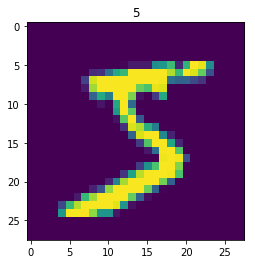

In [19]:
print(train_images[0])
plt.imshow(train_images[0].reshape(28,28))
plt.title(train_labels[0])
plt.show()

In [20]:
train_images = train_images/255 + .01
test_images = test_images/255 + .01

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

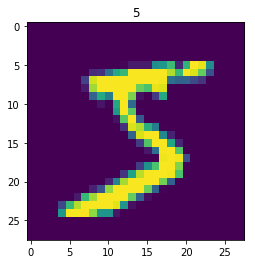

In [21]:
print(train_images[0])
plt.imshow(train_images[0].reshape(28,28))
plt.title(train_labels[0])
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.in1 = nn.Linear(784, 200)
        self.hd1 = nn.Linear(200, 10)
        self.out1 = nn.Linear(10,10)

    def forward(self, x):
        x = F.LogSigmoid(self.in1(x))
        x = F.LogSigmoid(self.hd1(x))
        x = F.LogSigmoid(self.out1(x))
        return x

ImportError: No module named 'torch'

In [ ]:
net = Net()
print(net)

In [ ]:
# run the main training loop
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.data[0]))

In [ ]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    data = data.view(-1, 28 * 28)
    net_out = net(data)
    # sum up batch loss
    test_loss += criterion(net_out, target).data[0]
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))